In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
# Load and preprocess MNIST data
(train_images, _), (_, _) = tf.keras.datasets.mnist.load_data()
(_, train_labels), _ = tf.keras.datasets.mnist.load_data()
train_images = (train_images - 127.5) / 127.5
train_images = tf.expand_dims(train_images, axis=-1)
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(256)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


## Exploratory Data Analysis (EDA)

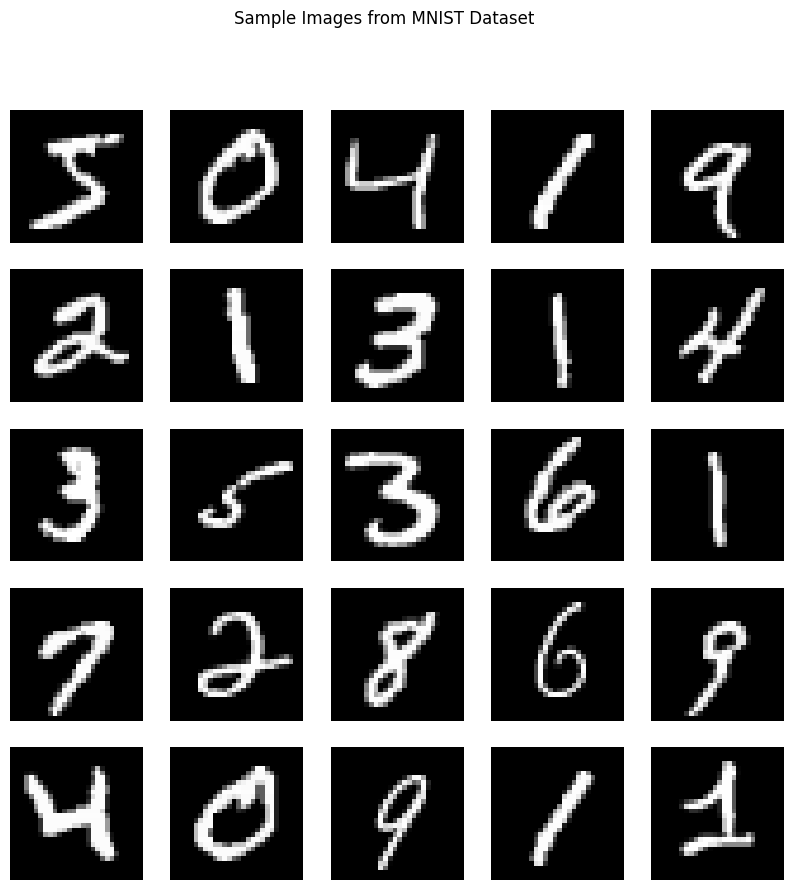

In [3]:
# Exploratory Data Analysis (EDA)
def plot_sample_images(train_images):
    """Visualizes a grid of sample images from the MNIST dataset."""
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.imshow(train_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.suptitle("Sample Images from MNIST Dataset")
    plt.show()

# Visualize sample images
plot_sample_images(train_images)

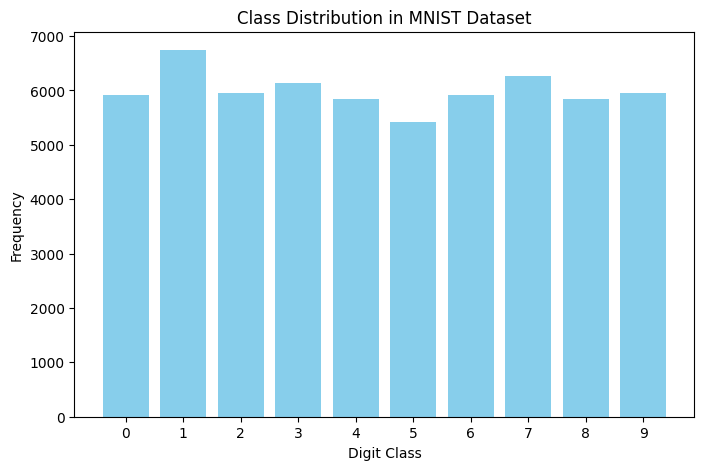

In [4]:
def plot_class_distribution(labels):
    """Plots the distribution of classes in the dataset."""
    plt.figure(figsize=(8, 5))
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts, color='skyblue')
    plt.title("Class Distribution in MNIST Dataset")
    plt.xlabel("Digit Class")
    plt.ylabel("Frequency")
    plt.xticks(unique)
    plt.show()

# Load labels for class distribution plot
plot_class_distribution(train_labels)



In [5]:
# Functions for generator and discriminator remain the same
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(256, input_shape=(100,), use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(512))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Dense(28 * 28, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))

    return model

In [6]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU())
    model.add(layers.Dense(1, activation='sigmoid'))

    return model

In [7]:
# Loss Functions
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [8]:
# Initialize models, optimizers, and cross-entropy
generator = make_generator_model()
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy()
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Training Step Function
@tf.function
def train_step(images):
    noise = tf.random.normal([batch_size, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
    
    return gen_loss, disc_loss

In [10]:
gen_losses, disc_losses = [], []

# Training Loop with Graphs
def train(dataset, epochs):

    for epoch in range(epochs):
        print(f"Epoch {epoch + 1}/{epochs}:")
        for image_batch in dataset:
            gen_loss, disc_loss = train_step(image_batch)
        
        gen_losses.append(gen_loss.numpy())
        disc_losses.append(disc_loss.numpy())
        
        # Visualize generated images after each epoch
        visualize_generated_images(epoch)

In [11]:
# Visualize Generated Images
def visualize_generated_images(epoch):
    noise = tf.random.normal([16, 100])
    generated_images = generator(noise, training=False)
    
    plt.figure(figsize=(6, 6))
    for i in range(generated_images.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(generated_images[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')
    plt.suptitle(f"Generated Images - Epoch {epoch+1}")
    plt.show()

In [12]:
# Training parameters
epochs = 50
batch_size = 128

Epoch 1/50:


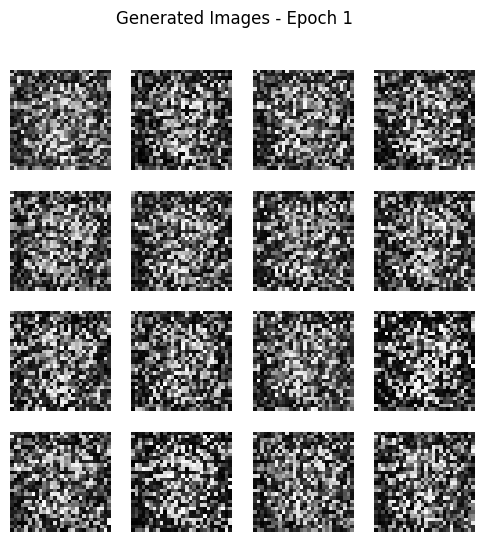

Epoch 2/50:


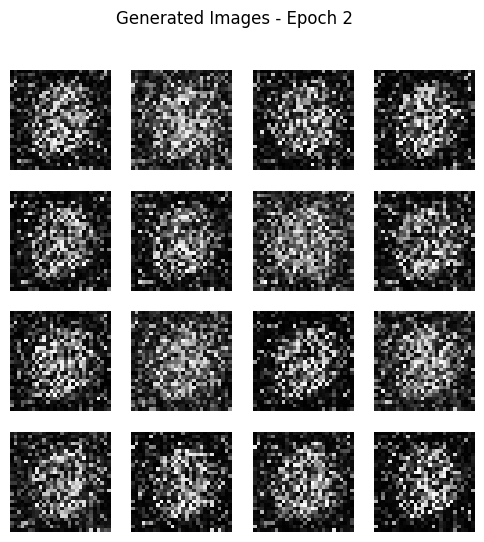

Epoch 3/50:


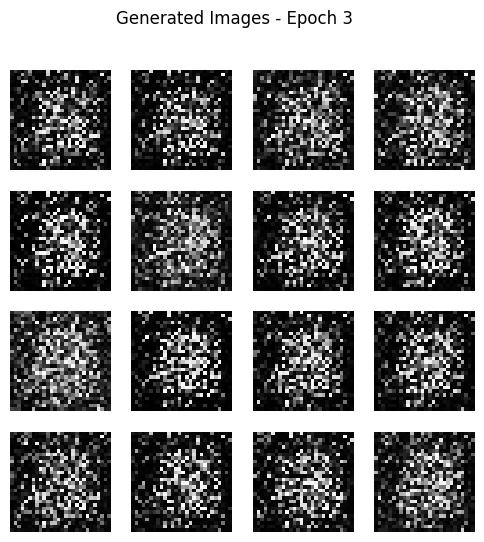

Epoch 4/50:


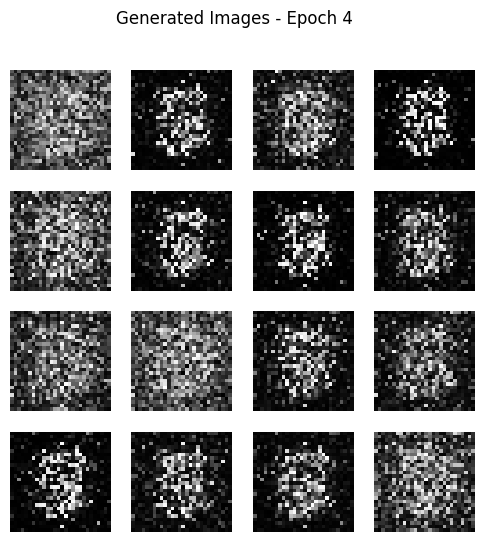

Epoch 5/50:


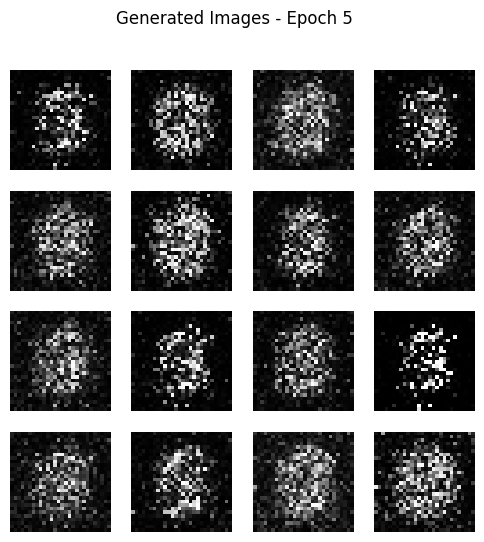

Epoch 6/50:


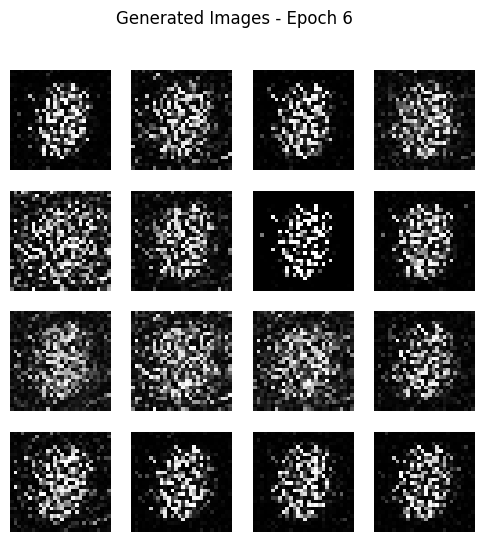

Epoch 7/50:


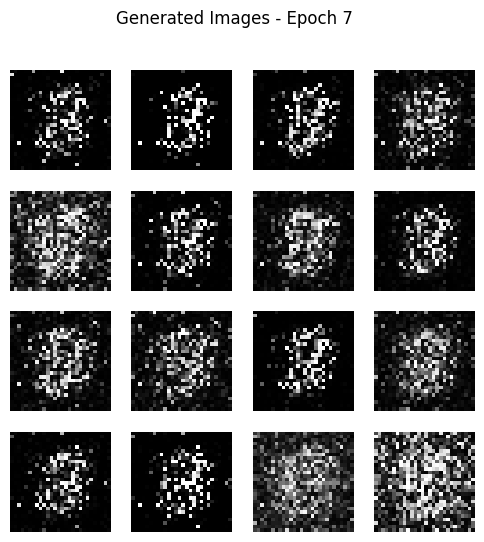

Epoch 8/50:


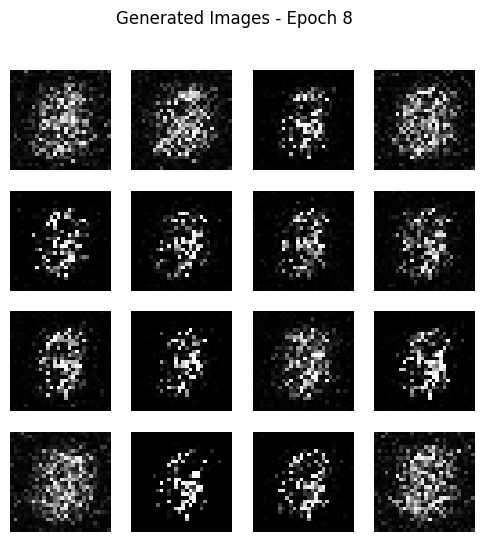

Epoch 9/50:


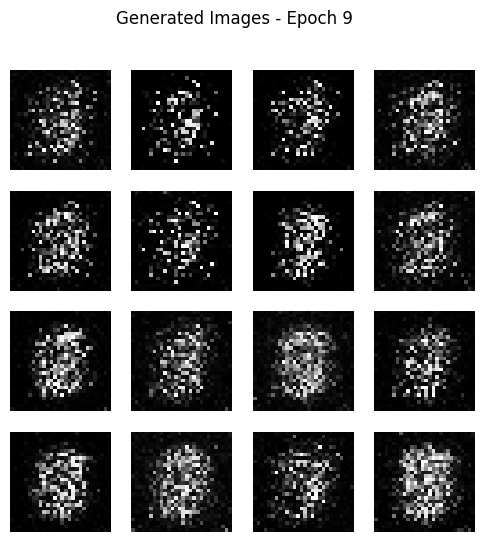

Epoch 10/50:


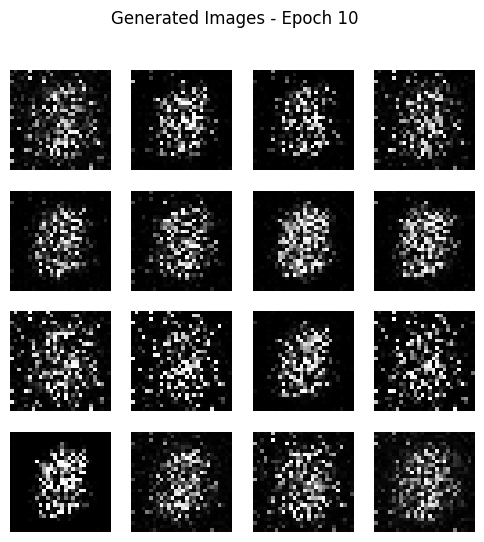

Epoch 11/50:


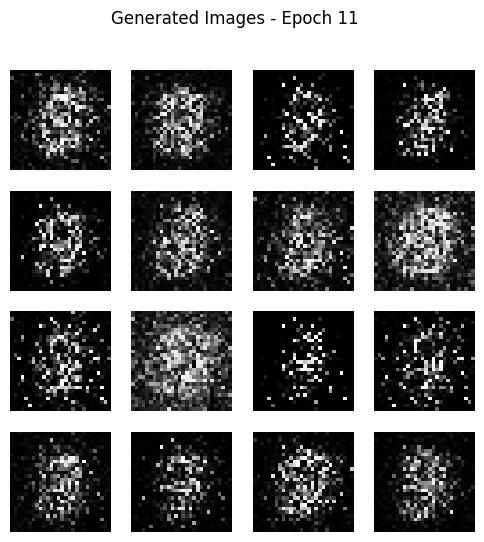

Epoch 12/50:


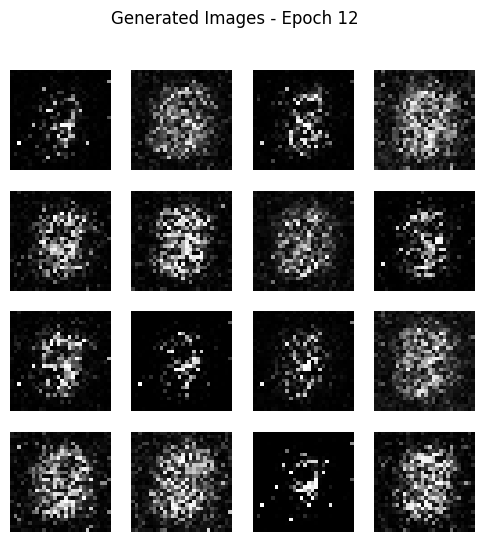

Epoch 13/50:


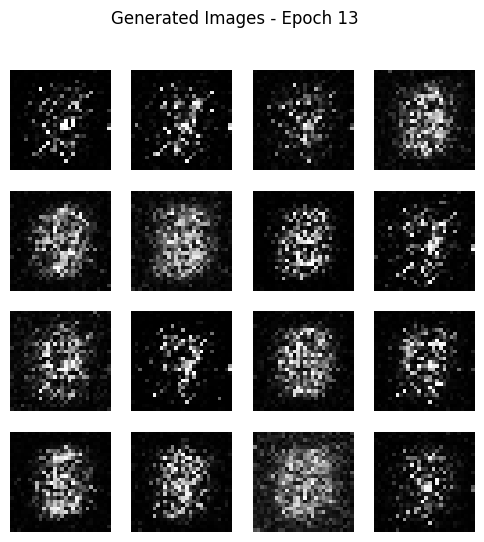

Epoch 14/50:


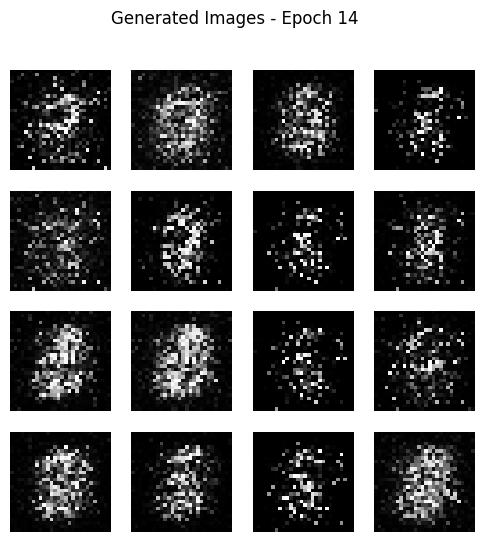

Epoch 15/50:


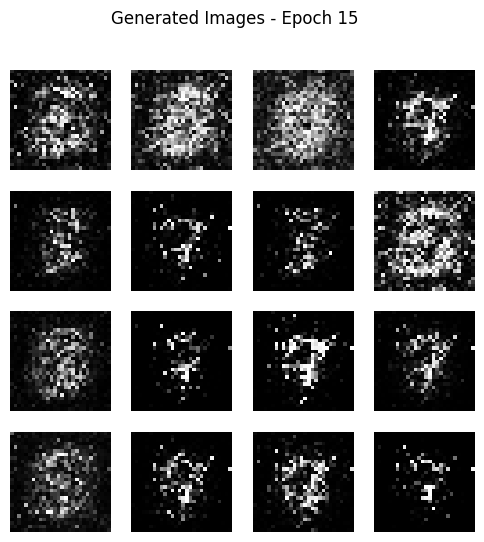

Epoch 16/50:


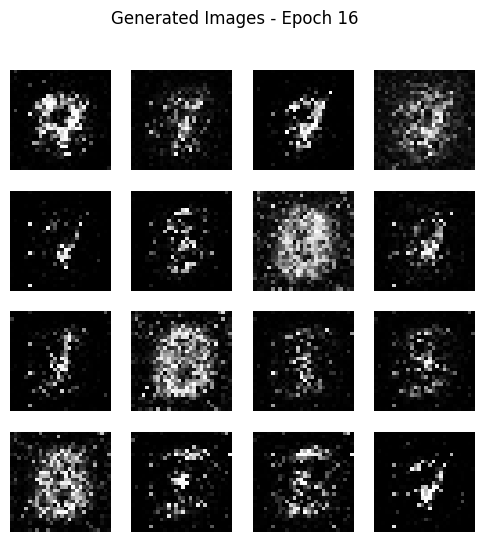

Epoch 17/50:


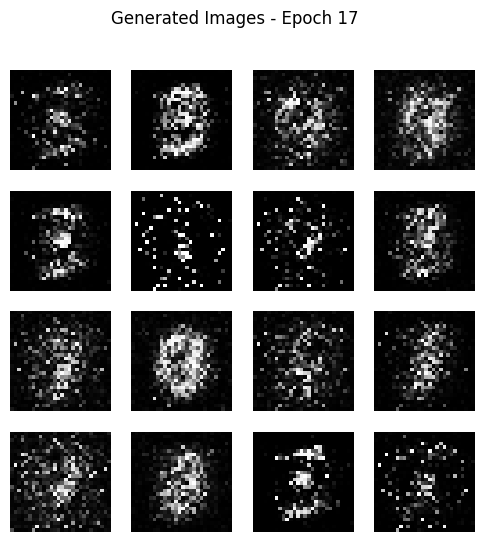

Epoch 18/50:


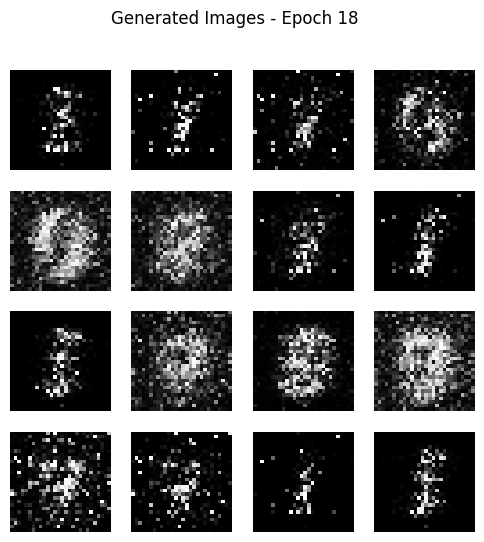

Epoch 19/50:


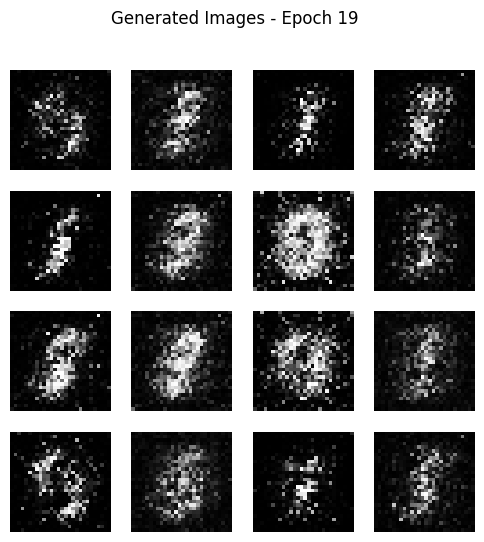

Epoch 20/50:


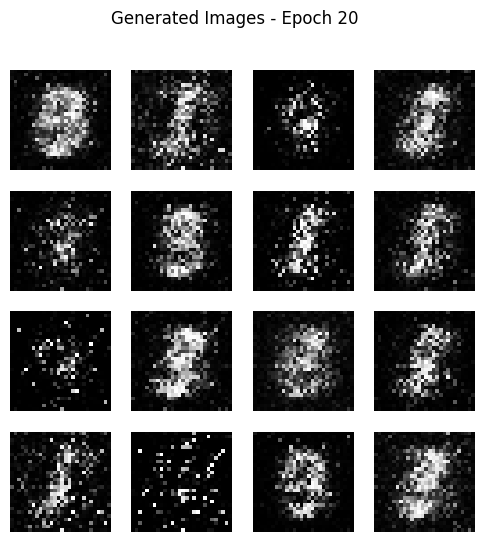

Epoch 21/50:


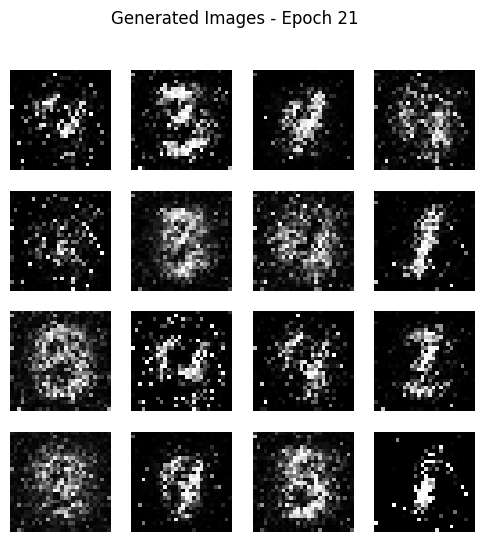

Epoch 22/50:


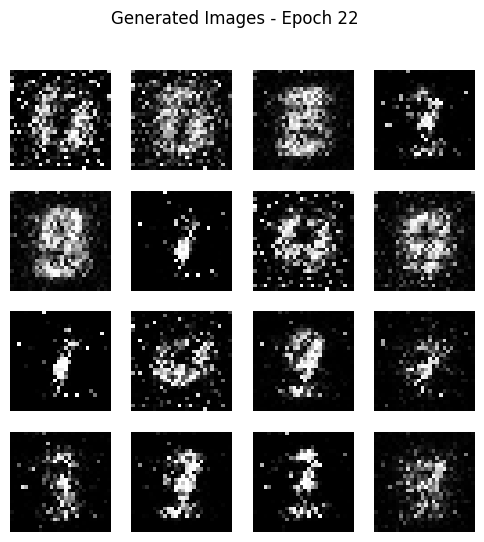

Epoch 23/50:


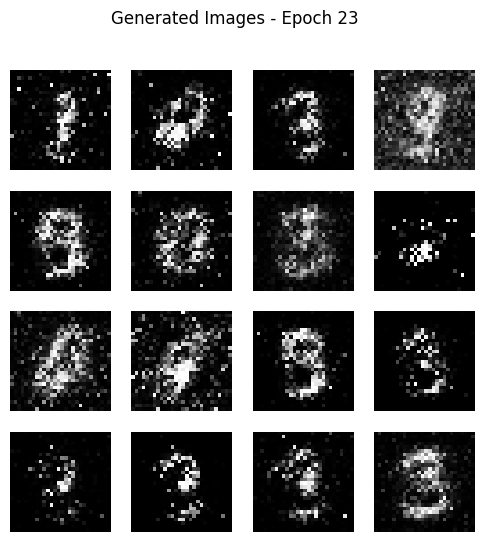

Epoch 24/50:


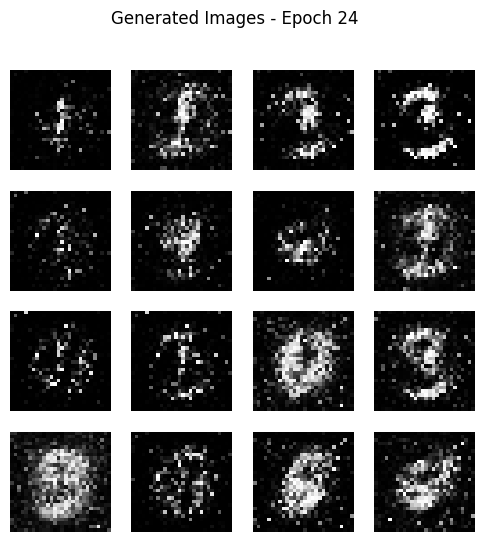

Epoch 25/50:


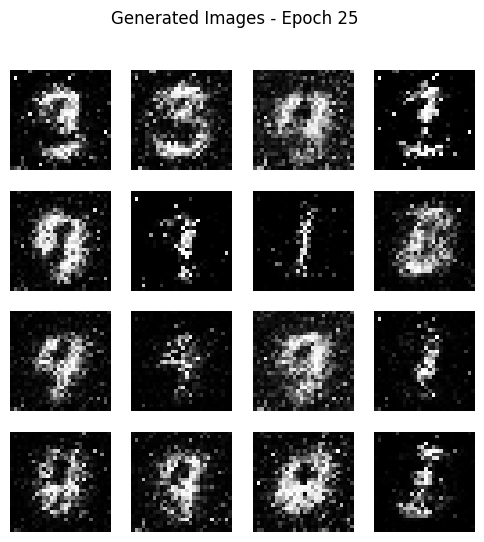

Epoch 26/50:


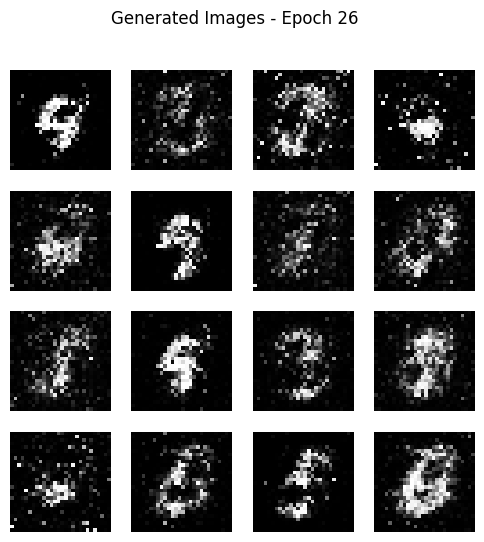

Epoch 27/50:


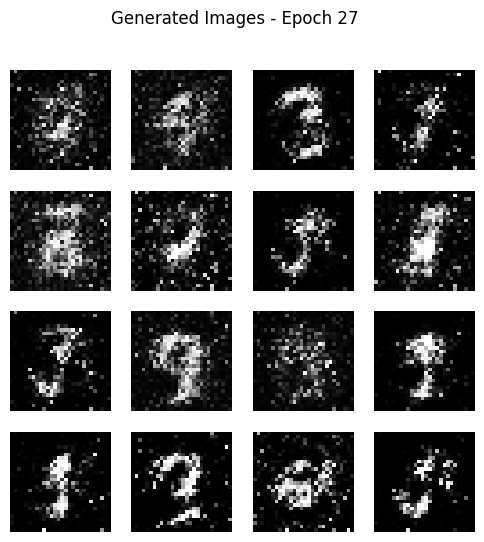

Epoch 28/50:


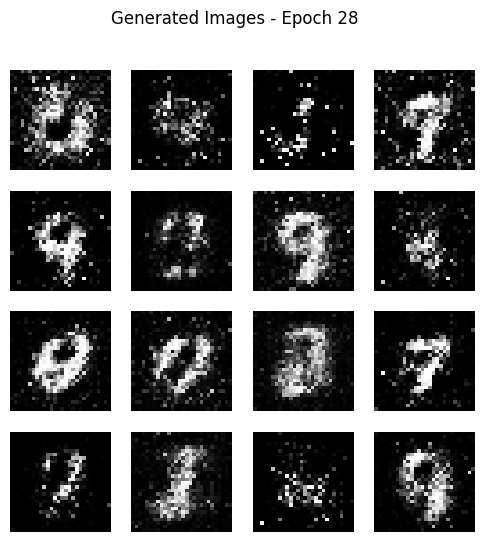

Epoch 29/50:


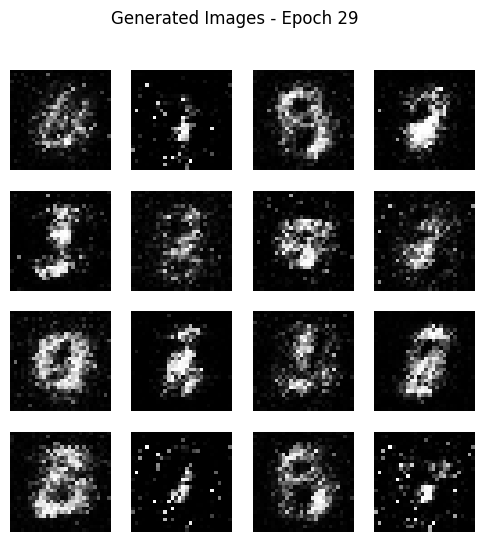

Epoch 30/50:


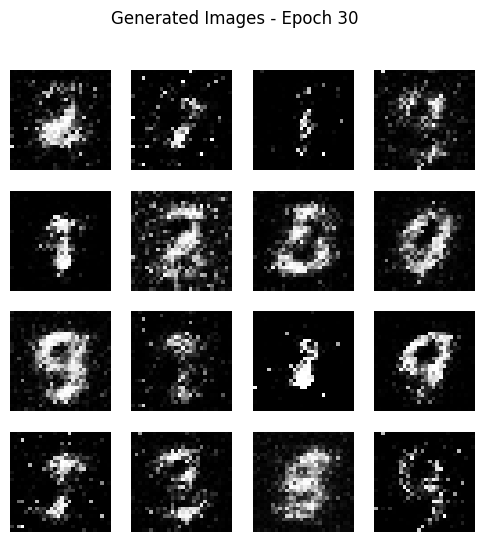

Epoch 31/50:


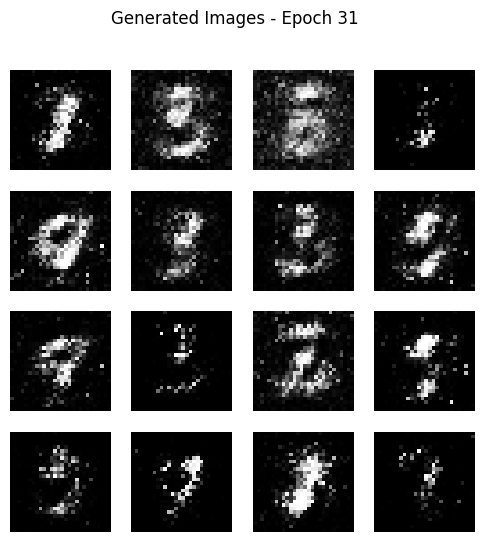

Epoch 32/50:


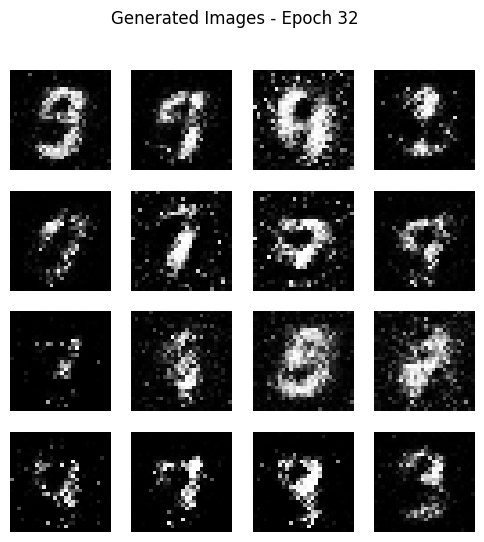

Epoch 33/50:


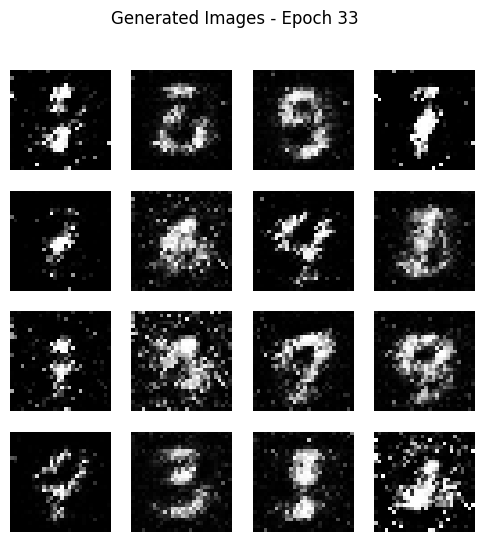

Epoch 34/50:


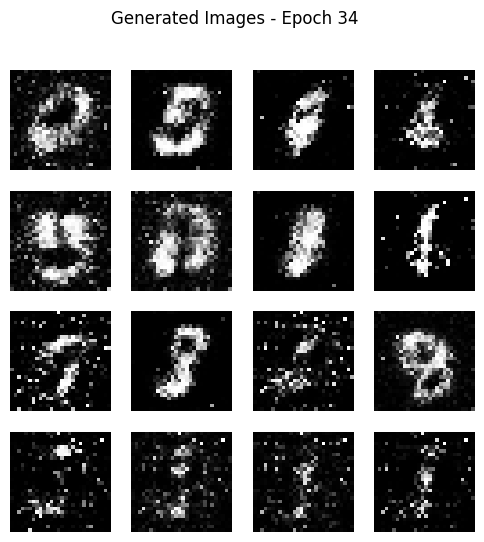

Epoch 35/50:


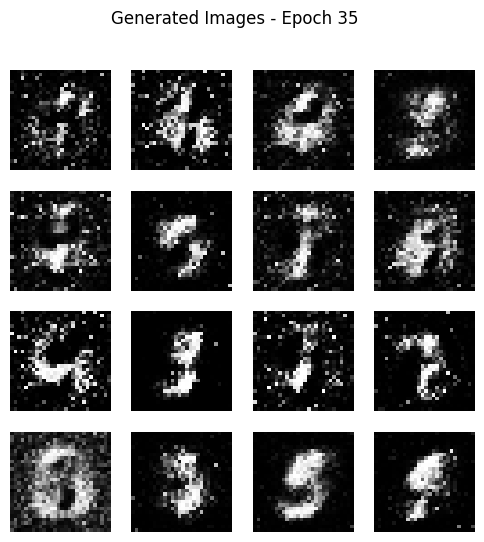

Epoch 36/50:


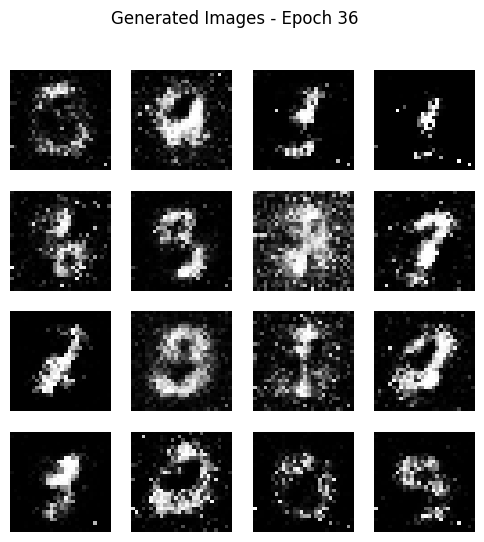

Epoch 37/50:


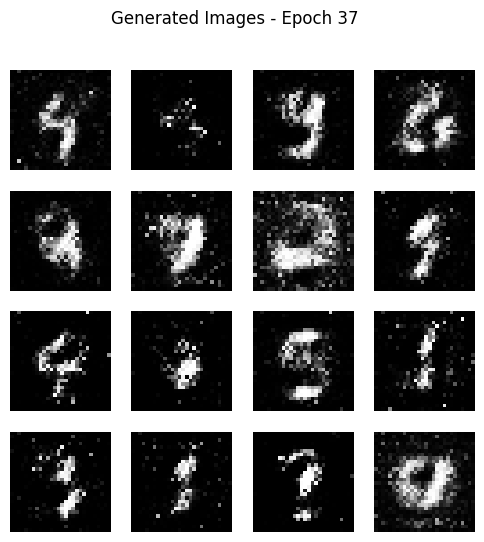

Epoch 38/50:


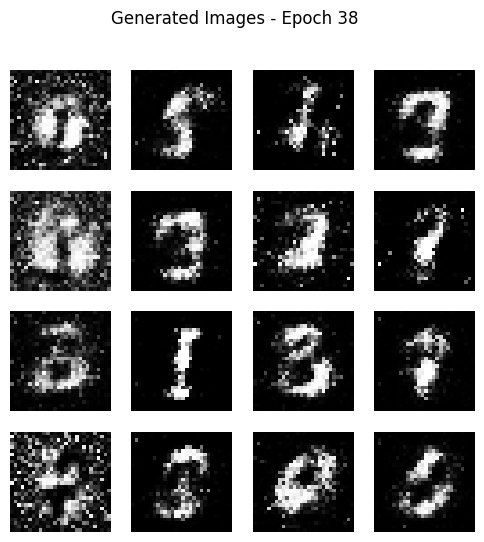

Epoch 39/50:


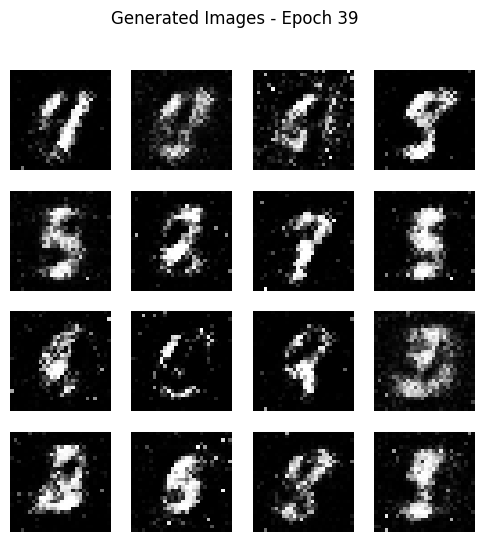

Epoch 40/50:


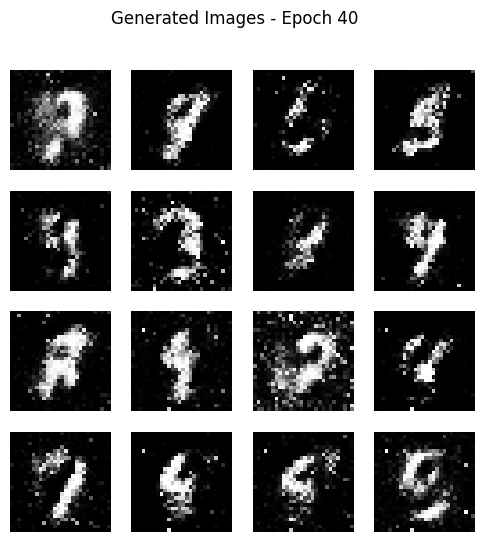

Epoch 41/50:


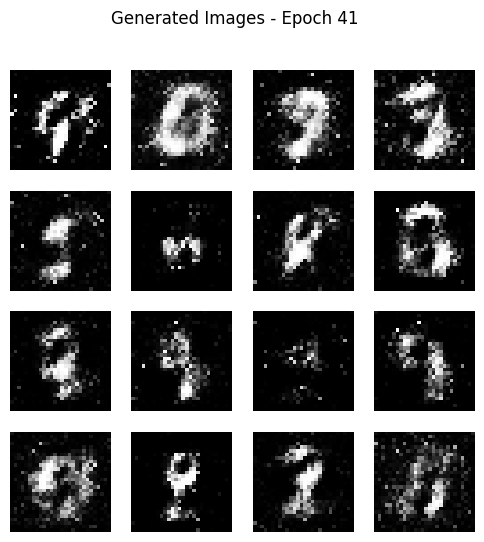

Epoch 42/50:


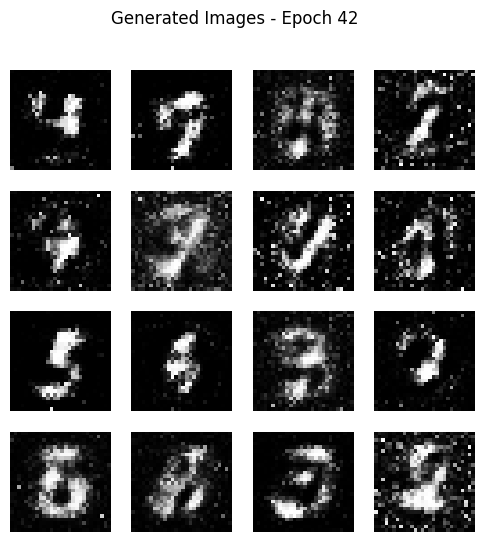

Epoch 43/50:


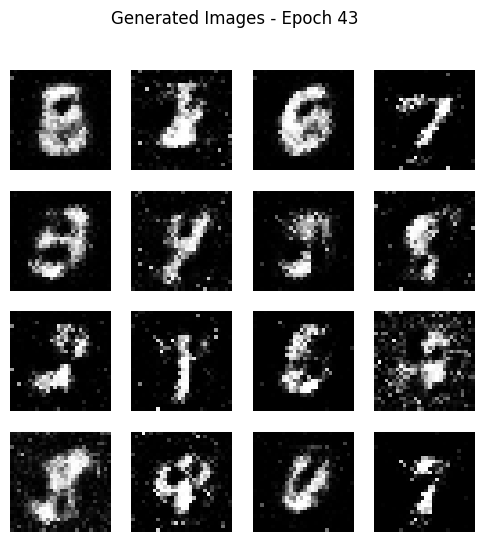

Epoch 44/50:


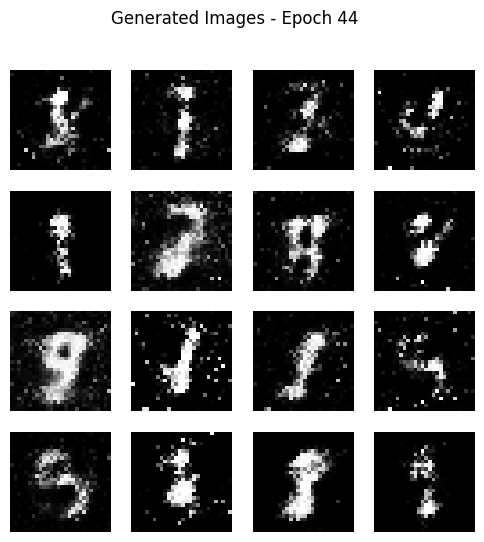

Epoch 45/50:


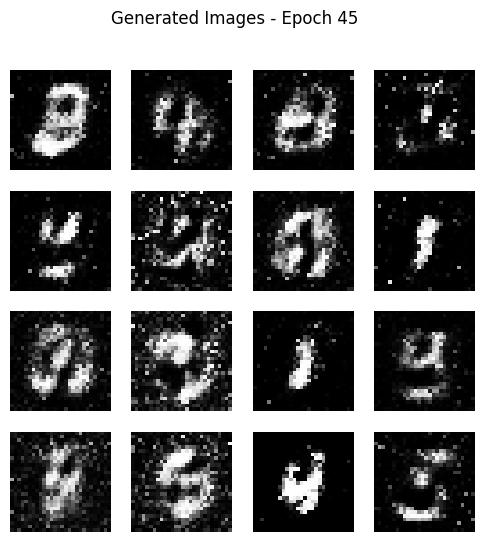

Epoch 46/50:


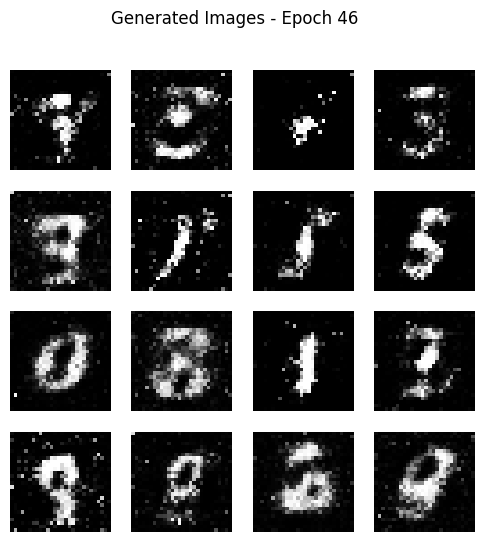

Epoch 47/50:


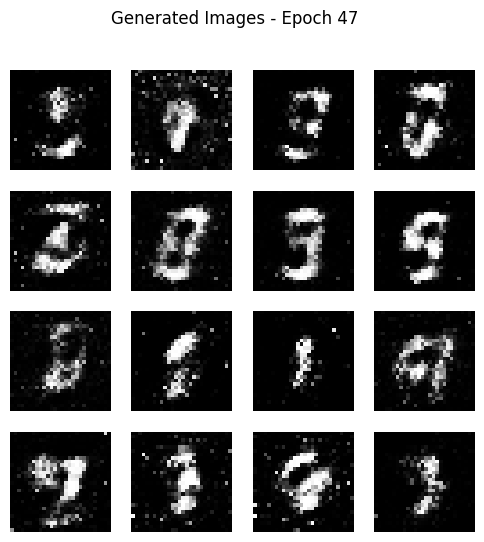

Epoch 48/50:


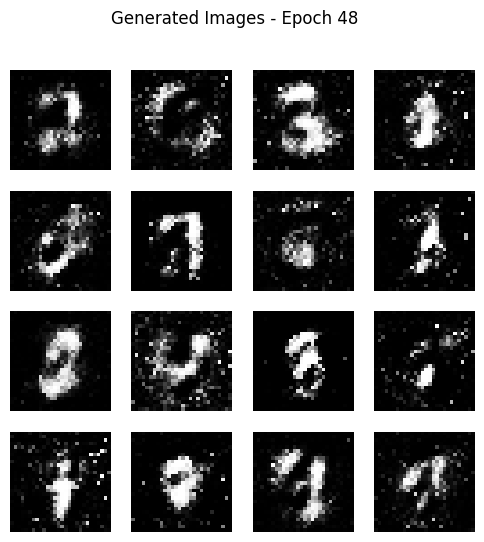

Epoch 49/50:


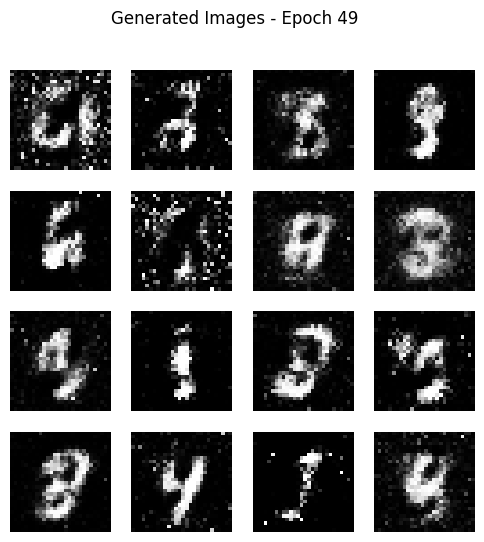

Epoch 50/50:


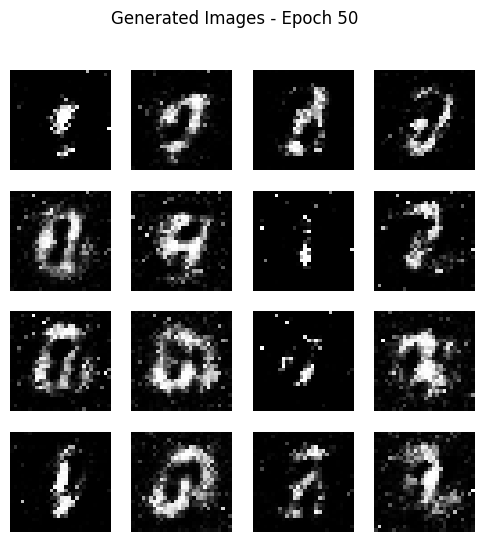

In [13]:
# Start training
train(train_dataset, epochs)

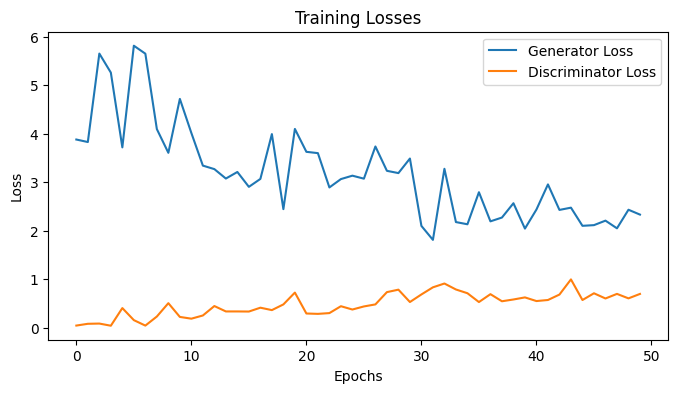

In [14]:
# Plot Losses
def plot_losses(gen_losses, disc_losses):
    plt.figure(figsize=(8, 4))
    plt.plot(gen_losses, label="Generator Loss")
    plt.plot(disc_losses, label="Discriminator Loss")
    plt.title("Training Losses")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

# Plot losses
plot_losses(gen_losses, disc_losses)